<a href="https://colab.research.google.com/github/Justsecret123/One-Piece-Image-Classifier/blob/master/Model_without_Keras_Tuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import PIL
import IPython

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import preprocessing
from tensorflow.keras import callbacks
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

import pathlib 
import zipfile

# Files

## Dataset download

In [2]:
data_path = 'drive/My Drive/Data.zip'
zip_ref = zipfile.ZipFile(data_path,'r')
zip_ref.extractall('/tmp/')

In [3]:
data_dir = pathlib.PosixPath('/tmp/Data')

## Images count

In [4]:
image_count = len(list(data_dir.glob("*/*")))
print(image_count)

5233


# Display some images

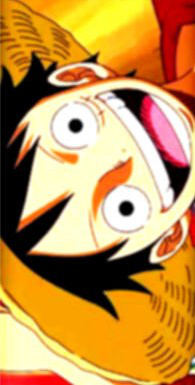

In [5]:
Luffy = list(data_dir.glob('Luffy/*'))
PIL.Image.open(str(Luffy[0]))

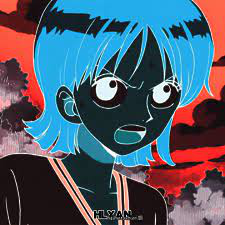

In [6]:
Nami = list(data_dir.glob('Nami/*'))
PIL.Image.open(str(Nami[0]))

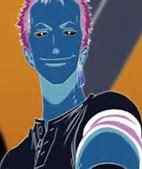

In [7]:
Zoro = list(data_dir.glob('Zoro/*'))
PIL.Image.open(str(Zoro[0]))

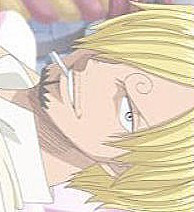

In [8]:
Sanji = list(data_dir.glob('Sanji/*'))
PIL.Image.open(str(Sanji[0]))

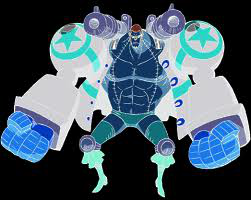

In [9]:
Franky = list(data_dir.glob('Franky/*'))
PIL.Image.open(str(Franky[0]))

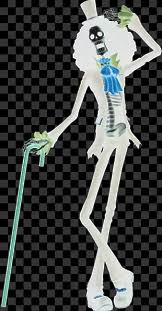

In [10]:
Brook = list(data_dir.glob('Brook/*'))
PIL.Image.open(str(Brook[0]))

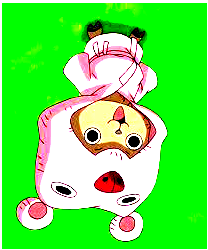

In [11]:
Chopper = list(data_dir.glob('Chopper/*'))
PIL.Image.open(str(Chopper[0]))

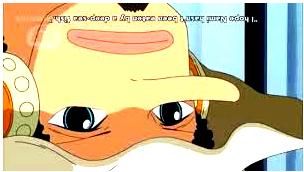

In [17]:
Usopp = list(data_dir.glob('Usopp/*'))
PIL.Image.open(str(Usopp[1]))

# Model builder

## Some parameters 

In [13]:
import random

In [14]:
random.seed(123)
seed = random.randint(0,100)

In [15]:
batch_size = 5
width = 180
height = 180

## Training dataset definition

In [16]:
train_dataset = preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(height,width),
    batch_size=batch_size
)

Found 5233 files belonging to 8 classes.
Using 4187 files for training.


In [18]:
classes_count = len(train_dataset.class_names)
class_names = train_dataset.class_names
print(class_names)

['Brook', 'Chopper', 'Franky', 'Luffy', 'Nami', 'Sanji', 'Usopp', 'Zoro']


## Validation dataset definition

In [19]:
val_dataset = preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(height, width),
    batch_size=batch_size
)

Found 5233 files belonging to 8 classes.
Using 1046 files for validation.


# Data augmentation

In [20]:
data_augmentation = Sequential(layers=[
                                tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(height,width,3)),
                                tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                tf.keras.layers.experimental.preprocessing.RandomZoom(0.1), 
                    ], name="data_augmentation")

# Model builder

## Description

*   5 Convolutional layers followed by a batch normalization layer, then a MaxPooling layer followed by a batch normalization layer  
*   A flatten layer 
*   A dense layer with 480 units
*   An dense layer (sigmoid) which represents the final output: Probability of input(X) belonging to each class

Based on Sergey Ioffe and Christian Szegedy "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift" research paper, there is no need to add a dropout layer since we've used a batch normalization layer. 





In [21]:
def model_builder():

    model = Sequential()

    model.add(data_augmentation)
    
    model.add(layers.Conv2D(filters=15, kernel_size=3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D())
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(filters=30, kernel_size=3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D())
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(filters=60, kernel_size=3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D())
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(filters=90, kernel_size=3, activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D())
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(filters=120, kernel_size=3, activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D())
    model.add(layers.BatchNormalization())
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(units=512, activation='relu',kernel_regularizer=regularizers.l2(1e-5)))
    model.add(layers.Dense(classes_count, activation='sigmoid',name='final_output'))

    model.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Model fit

In [22]:
model = model_builder()

### Use early stopping to stop the training process if the validation accuracy stops increasing after 6 epochs, and restore the weights which minimize the validation accuracy

In [23]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=15, mode ="max", verbose=2, restore_best_weights=True)

In [24]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=100,
    verbose=1, 
    callbacks = [stop_early]
)

Epoch 1/100
838/838 [==============================] - 53s 25ms/step - loss: 2.5619 - accuracy: 0.2403 - val_loss: 2.0854 - val_accuracy: 0.2897
Epoch 2/100
838/838 [==============================] - 21s 25ms/step - loss: 1.7396 - accuracy: 0.3788 - val_loss: 1.7156 - val_accuracy: 0.3910
Epoch 3/100
838/838 [==============================] - 21s 25ms/step - loss: 1.5649 - accuracy: 0.4416 - val_loss: 1.5676 - val_accuracy: 0.4455
Epoch 4/100
838/838 [==============================] - 21s 25ms/step - loss: 1.4891 - accuracy: 0.4865 - val_loss: 1.5517 - val_accuracy: 0.4704
Epoch 5/100
838/838 [==============================] - 21s 26ms/step - loss: 1.3979 - accuracy: 0.5125 - val_loss: 1.4579 - val_accuracy: 0.5382
Epoch 6/100
838/838 [==============================] - 21s 25ms/step - loss: 1.3334 - accuracy: 0.5467 - val_loss: 1.2545 - val_accuracy: 0.5707
Epoch 7/100
838/838 [==============================] - 21s 25ms/step - loss: 1.2468 - accuracy: 0.5641 - val_loss: 1.7970 - val_ac

# Plotting the training results

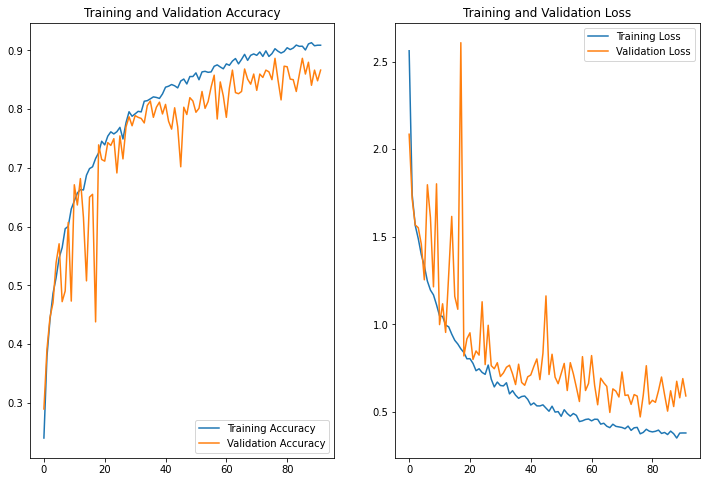

Maximum validation accuracy:  0.8862332701683044
Minimum loss: 0.4716699421405792


In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history["loss"]))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

position = np.argmax(history.history['val_accuracy'])
print(f"Maximum validation accuracy:  {history.history['val_accuracy'][position]}\nMinimum loss: {history.history['val_loss'][position]}")

# Model summary 

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data_augmentation (Sequentia (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 15)      420       
_________________________________________________________________
batch_normalization (BatchNo (None, 178, 178, 15)      60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 15)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 89, 89, 15)        60        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 30)        4080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 87, 87, 30)        1

# Predictions

In [27]:
from google.colab import files
from keras.preprocessing import image

In [28]:
class_names = train_dataset.class_names
class_names

['Brook', 'Chopper', 'Franky', 'Luffy', 'Nami', 'Sanji', 'Usopp', 'Zoro']

In [29]:
def prediction(): 
  for filename in uploaded.keys():

    path = "/content/" + filename
    im = image.load_img(path,target_size=(180,180))
    
    inputs = image.img_to_array(im)

    inputs = np.vstack([inputs])

    inputs = tf.expand_dims(inputs,axis=0) #Creates a batch

    
    score = model.predict(inputs) #Make a prediction based on input values
    score = np.squeeze(score)
    print("Image: ", path)
    for i in range (len(score)):
      print("\nProbability of being " + class_names[i] + \
              ": ", 100*score[i] , "%")

    object_score = np.max(score)  #np.argmax(score) :  returns the index with the highest score 
    object_class = class_names[np.argmax(score)]  #np.max(score) returns the highest probability of our input belonging to one of our classes
    

    plt.figure()
    plt.title("This image most likely belongs to " + str(object_class)+ \
              " category with a " + str(object_score) + " score.\n\n")
    
    plt.imshow(im)


    print("This image most likely belongs to " +str(object_class)+ \
          " category with a " + str(object_score) + " score. \n\n"
    )

In [32]:
uploaded = files.upload() 

Saving Brook test.jfif to Brook test (1).jfif
Saving Chopper test.jfif to Chopper test (1).jfif
Saving Franky test.jfif to Franky test (1).jfif
Saving Luffy test.png to Luffy test (1).png
Saving Nami test.jpg to Nami test (1).jpg
Saving Sanji test.jpg to Sanji test (1).jpg
Saving Usopp test_.jfif to Usopp test_.jfif
Saving Zoro test.jpg to Zoro test (1).jpg


## Prediction with some "difficult" images

Image:  /content/Brook test.jfif

Probability of being Brook:  21.792124211788177 %

Probability of being Chopper:  1.0625898028138181e-05 %

Probability of being Franky:  0.002009078161790967 %

Probability of being Luffy:  5.648368173183371e-06 %

Probability of being Nami:  0.10976054472848773 %

Probability of being Sanji:  5.131126079582771e-08 %

Probability of being Usopp:  0.11953362263739109 %

Probability of being Zoro:  0.025928180548362434 %
This image most likely belongs to Brook category with a 0.21792124 score. 


Image:  /content/Chopper test.jfif

Probability of being Brook:  0.00027907271942240186 %

Probability of being Chopper:  17.32654869556427 %

Probability of being Franky:  3.08844960272836e-05 %

Probability of being Luffy:  0.26732515543699265 %

Probability of being Nami:  3.860087360862963e-05 %

Probability of being Sanji:  0.00024170174128812505 %

Probability of being Usopp:  0.15041829319670796 %

Probability of being Zoro:  4.808094725012779 %
This ima

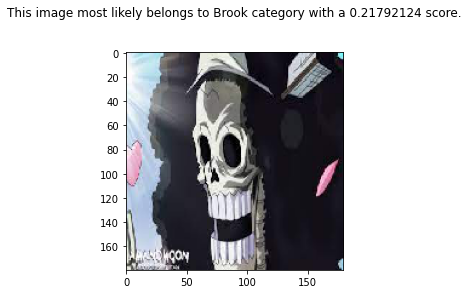

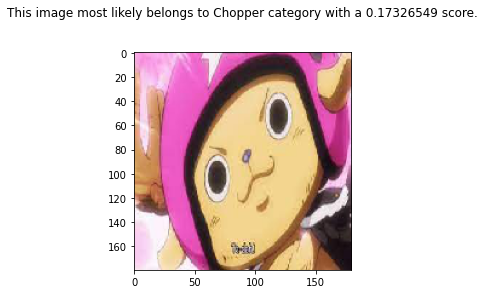

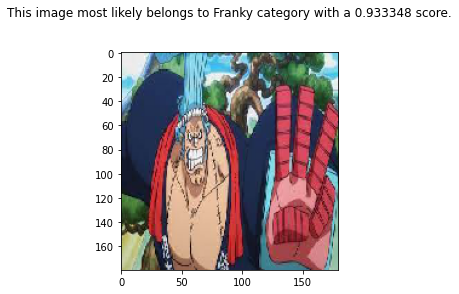

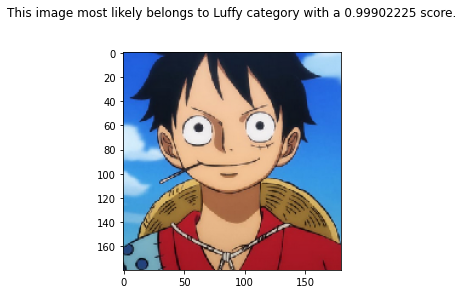

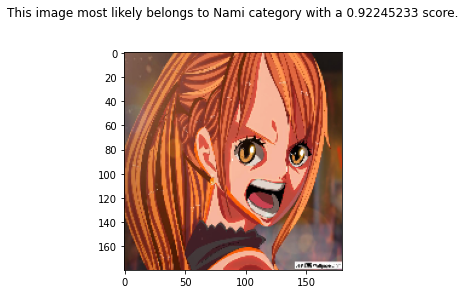

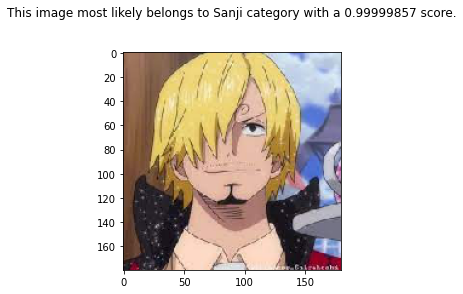

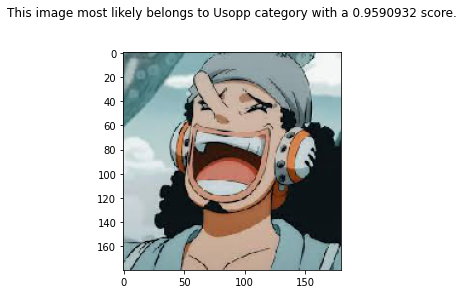

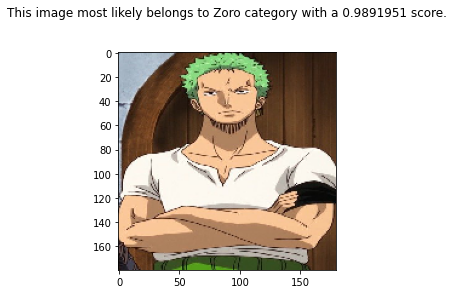

In [33]:
prediction()

# Save the model 

## Saved model format

In [34]:
model.save('drive/My Drive/One_Piece_Image_Classifier_Model_v8')

INFO:tensorflow:Assets written to: drive/My Drive/One_Piece_Image_Classifier_Model_v8/assets


## h5 format

In [ ]:
model.save('drive/My Drive/One_Piece_Image_Classifier_Model_v8.h5')

In [35]:
model.evaluate(x=val_dataset, return_dict=True)

210/210 [==============================] - 3s 13ms/step - loss: 0.4717 - accuracy: 0.8862


{'accuracy': 0.8862332701683044, 'loss': 0.4716697633266449}